In [1]:
import os
import numpy as  np
from data_import import Session
from rsync import Rsync_aligner
from paq2py import *

import matplotlib.pyplot as plt


In [2]:
def threshold_detect(signal, threshold):
    '''lloyd russell'''
    thresh_signal = signal > threshold
    thresh_signal[1:][thresh_signal[:-1] & thresh_signal[1:]] = False
    times = np.where(thresh_signal)
    return times[0]

In [3]:
behaviour_filepath = r"C:\Users\User\Documents\Code\blimp\pyControl\data\test_rsync-2019-04-13-123629.txt"
paq_path = r"Y:\Test\2019-04-13_testRs004.paq"

20000

In [4]:
paq = paq_read(paq_path)
rsync_idx = paq['chan_names'].index('pycontrol_rsync')
rsync_voltage = paq['data'][rsync_idx, :]

pulse_times_paq = threshold_detect(rsync_voltage, 1)


In [5]:
behaviour_session = Session(behaviour_filepath, int_subject_IDs=False)
pulse_times_beh = behaviour_session.times['rsync'] # Sync pulse times recorded by pyControl.

Importing data file: test_rsync-2019-04-13-123629.txt


In [6]:
len(pulse_times_paq)

852

In [7]:
len(pulse_times_beh)

859

In [11]:
# %matplotlib notebook
# plt.figure()
# plt.plot(rsync_voltage)
# plt.plot(pulse_times_paq, np.ones(len(pulse_times_paq)), '.')
# plt.show()

<IPython.core.display.Javascript object>


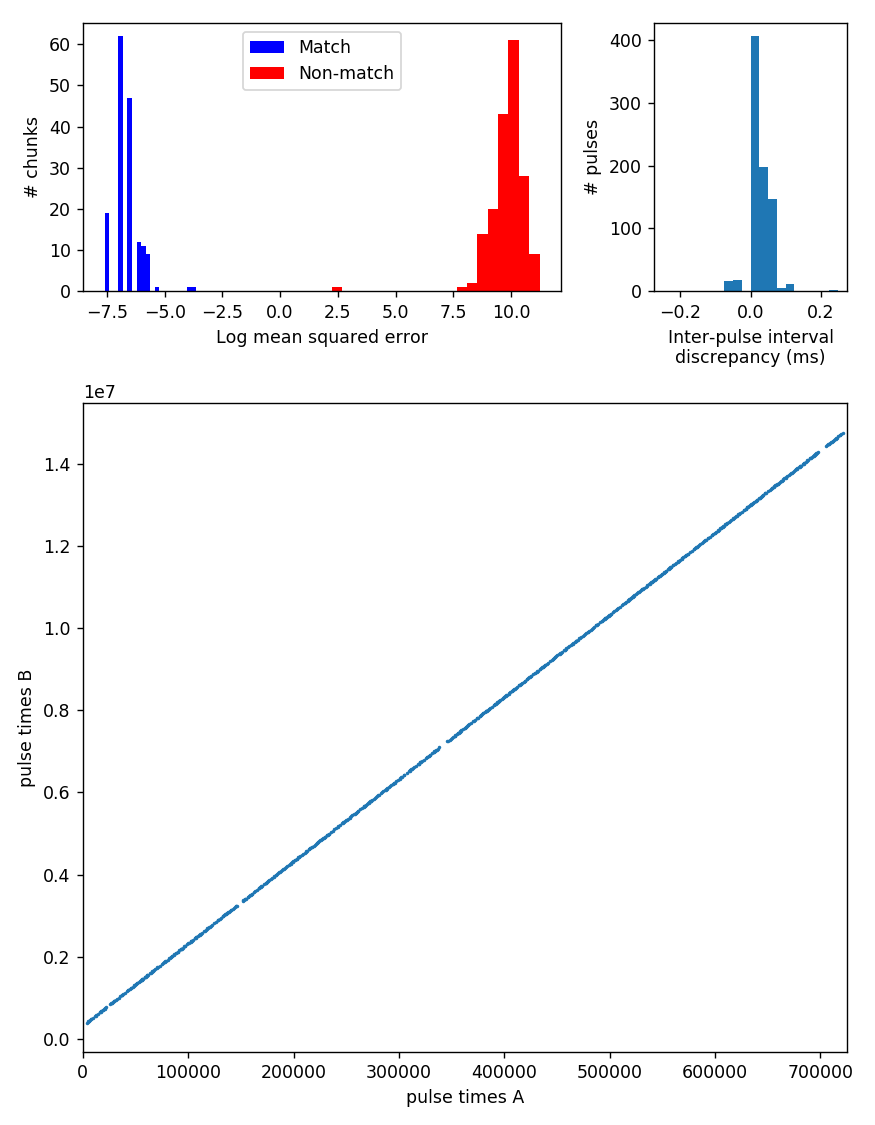

In [17]:
aligner = Rsync_aligner(pulse_times_A=pulse_times_beh, pulse_times_B=pulse_times_paq, # Instantiate aligner object.
                        units_B=1000/paq['rate'], plot=True)

In [16]:
aligner